This is one of my first independent data science projects, which utilizes Kaggle's famous Titanic dataset. The dataset contains information about the Titanic's passengers, and specifically whether they survived or not. After leveraging data visualization and manipulation techniques, logistic regression is used in order to predict whether a passenger survived or not based on given inputs. 

This predictive process can be varied in countless ways, such as using different Machine Learning algorithms, or utilizing alternative data cleaning techniques. Aside from predicting survival, the dataset could also be used in other ways, such as leveraging Natural Language Processing techniques to determine a passenger's class based on their name. I may choose to explore some of these projects in the future. For now, please enjoy 

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<h3><b>Loading the Data</b></h3>

In [19]:
train = pd.read_csv('train.csv')

In [20]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<h3><b>Visualizing the Data</b></h3>

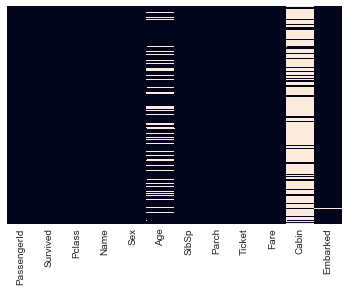

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

The above heatmap is used in order to identify missing passenger attributes. 'Age' has some missing values, so a data cleaning technique such as interpolation may need to be used to fill in the gaps. 'Cabin' has many missing values, so it may be beneficial to drop the attribute from our analysis.

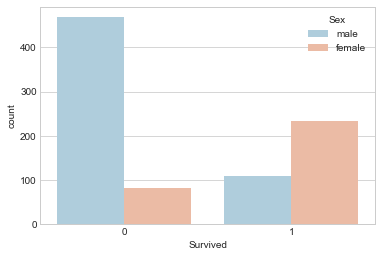

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

The plot above confirms what many already knew about the disaster: women were more likely to survive while men were more likely to perish.

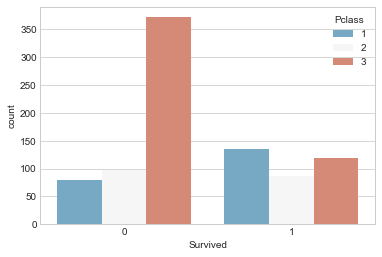

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='RdBu_r')

Similarly, the plot above depicts higher survival rates for the rich (1st class) and lower rates for the poor (3rd class).

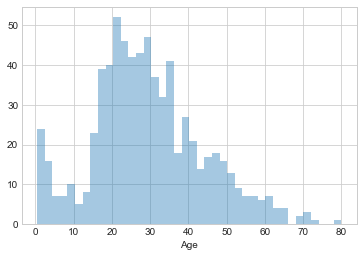

In [24]:
sns.distplot(train['Age'].dropna(),kde=False,bins=40)

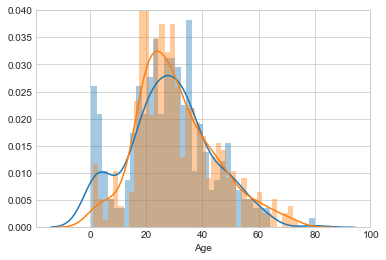

In [25]:
# Visualize deaths vs survivals based on age to put ages into bins
ages_survived = train[train['Survived'] == 1]['Age']
ages_died = train[train['Survived'] == 0]['Age']

sns.distplot(ages_survived.dropna(),kde=True,bins=40)
sns.distplot(ages_died.dropna(),kde=True,bins=40)

Saving children was a top priority compared with other age groups. This can be seen in the distribution above. Passengers with an age from 0-14 usually survived. Since there does not appear to be other large age clusters (10+ years) with a large majority survived or died. I will create a new column that denotes minor vs. non-minor.

<h3><b>Data Cleaning</b></h3>

In [26]:
# Make Cabin types numeric
train.loc[train.Embarked == 'S', 'Embarked'] = 1
train.loc[train.Embarked == 'C', 'Embarked'] = 2
train.loc[train.Embarked == 'Q', 'Embarked'] = 3

# Make sexes numeric
train.loc[train.Sex == 'male', 'Sex'] = 0
train.loc[train.Sex == 'female', 'Sex'] = 1

# Convert column types to float
train['Sex'] = train['Sex'].astype(float)
train['Embarked'] = train['Embarked'].astype(float)

# Drop columns that won't be used
train = train.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1)

# Fill in missing values
train = train.interpolate()

# Divide ages into blocks
def getAgeBlock(row):
    if row['Age'] <= 14:
        return 0
# Commented out elif since it did not improve algorithm accuracy
#     elif row['Age'] > 14 and row['Age'] <= 30:
#         return 1
    else:
        return 2

train['Minor'] = train.apply(lambda row: getAgeBlock(row),axis=1)
train = train.drop(['Age'], axis=1)

In [27]:
# Print the dataframe after all manipulations
train

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Minor
0,0,3,0.0,1,0,7.2500,1.0,2
1,1,1,1.0,1,0,71.2833,2.0,2
2,1,3,1.0,0,0,7.9250,1.0,2
3,1,1,1.0,1,0,53.1000,1.0,2
4,0,3,0.0,0,0,8.0500,1.0,2
5,0,3,0.0,0,0,8.4583,3.0,2
6,0,1,0.0,0,0,51.8625,1.0,2
7,0,3,0.0,3,1,21.0750,1.0,0
8,1,3,1.0,0,2,11.1333,1.0,2
9,1,2,1.0,1,0,30.0708,2.0,0


<h3><b>Machine Learning</b></h3>

In [28]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

# Create models
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null float64
Minor       891 non-null int64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [29]:
# Train models
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
# Test models
predictions = logmodel.predict(X_test)

In [31]:
# Ouput summaries and determine which model performed the best
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.78      0.90      0.83       154
          1       0.82      0.65      0.73       114

avg / total       0.80      0.79      0.79       268



<h3><b>Analysis of Results:</b></h3>

Precision: Measures the percentage of survivals/deaths that were classified correctly. For example, a passenger that died (0) but was classified as survived (1) would lower the 'survived' precision. Both the precisions for 'survived' (0.82) and 'died' (0.78) are pretty high and close to one another, which is a good sign. To increase the precision, we would want to decrease the number of false positives (i.e. dead passengers who were predicted to survive is a false positive to 'survival').

Recall: Measures the percentage of correct classifications that were not missed by the algorithm. For example, a passenger that survived (1) but was classified as dead (0) would lower the 'survived' recall. Since the 'survived' recall (.65) is lower than 'died' (.90), it would be beneficial to attempt to decrease the number of false negatives for survivial (or the surviving passengers who were predicted to be dead).

The average precision and recall were both around 0.80, which seems to be pretty good. The precision and recall can be increased further by tweaking the ML algorithm used, the combination of passenger attributes, and/or how the data is cleansed.